(100, 2)


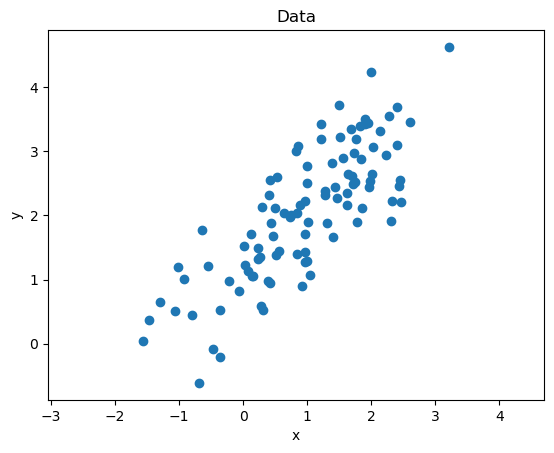

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed
np.random.seed(0)

# Generate 100 points from a normal distribution
mean = np.array([1, 2])
cov = np.array([[1, 0.8], [0.8, 1]])

data = np.random.multivariate_normal(mean, cov, 100)
print(data.shape)

# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data")
plt.axis("equal")
plt.show()

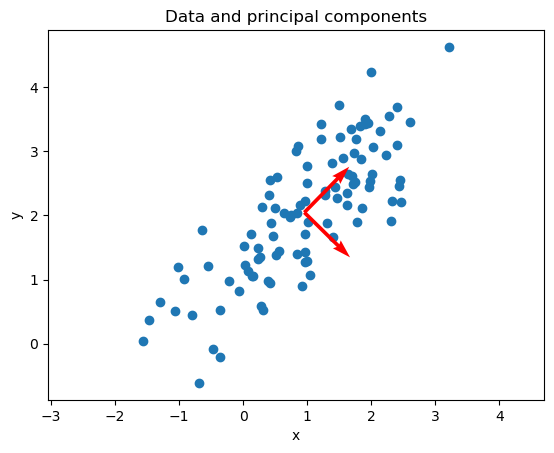

In [6]:
# Compute the mean of the data
mean = data.mean(axis=0)

# Compute SVD of centered data
U, S, V = np.linalg.svd(data - mean)

# Plot data and principal components
plt.scatter(data[:, 0], data[:, 1])
plt.quiver(mean[0], mean[1], V[0, 0], V[1, 0], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(mean[0], mean[1], V[0, 1], V[1, 1], angles='xy', scale_units='xy', scale=1, color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Data and principal components")
plt.show()

## Principal Components

The principal components of a matrix are the eigenvectors of the covariance matrix of the original data. Since we computed the singular vectors using SVD, the right singular vectors *are* the principal components. Remember that SVD computes the covariance matrix of the data.

These vectors are the directions along which the data varies the most. This means that we can project the data onto the principal components and reduce the dimensionality of the data while preserving the most important information.

In the cell below, we will project the data onto the first principal component and plot the data in this new space.

In [12]:
# Project the centered data onto principal components
data_centered = data - mean
pc1_coefficients = data_centered @ V[:, 0]

The vector `projected_data` contains the coordinates of the data points with respect to the first principal component. We can multiply these coefficients by the first principal component to obtain the projection of the data onto the first principal component.

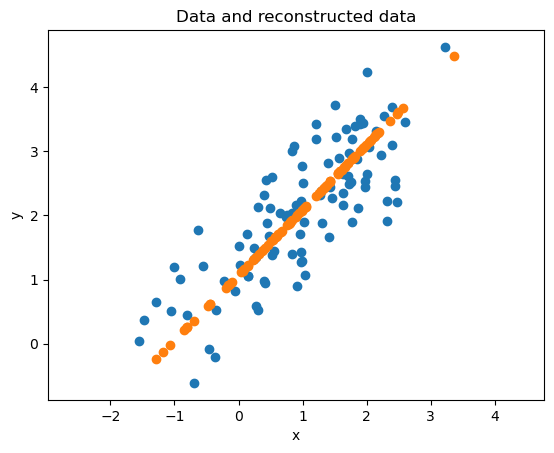

In [14]:
reconstructed_data = np.outer(pc1_coefficients, V[:, 0]) + mean

# Plot the data and the reconstructed data
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Data and reconstructed data")
plt.show()